In [1]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as kr

data = pd.read_csv("https://query.data.world/s/5tzsx3igwmoqsjgpbseglj24nxib3l?dws=00000", na_values=["?"])
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [2]:
data.drop(columns="Voltage", inplace=True)
data.dropna(inplace=True)
data["Datetime"] = pd.to_datetime(data.pop("Date"), dayfirst=True, format="mixed") + pd.to_timedelta(data.pop("Time"))
data = data.set_index("Datetime")
data.head()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,
2007-01-01 00:00:00,2.580,0.136,10.6,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,0.100,10.4,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,0.100,10.4,0.0,0.0,0.0
2007-01-01 00:03:00,2.550,0.100,10.4,0.0,0.0,0.0
2007-01-01 00:04:00,2.554,0.100,10.4,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256869 entries, 2007-01-01 00:00:00 to 2007-06-30 23:59:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    256869 non-null  float64
 1   Global_reactive_power  256869 non-null  float64
 2   Global_intensity       256869 non-null  float64
 3   Sub_metering_1         256869 non-null  float64
 4   Sub_metering_2         256869 non-null  float64
 5   Sub_metering_3         256869 non-null  float64
dtypes: float64(6)
memory usage: 13.7 MB


In [4]:
#standardize
DFmean = data.values.mean(axis=0)
DFstd = data.values.std(axis=0)
data = (data.values - DFmean) / DFstd
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5
0,1.197349,0.109691,1.125165,-0.198731,-0.251926,-0.712354
1,1.173657,-0.212106,1.085161,-0.198731,-0.251926,-0.712354
2,1.171965,-0.212106,1.085161,-0.198731,-0.251926,-0.712354
3,1.171965,-0.212106,1.085161,-0.198731,-0.251926,-0.712354
4,1.175350,-0.212106,1.085161,-0.198731,-0.251926,-0.712354


In [5]:
trainDF = data.head(201700) #for a nice result graph
valDF = data.drop(trainDF.index)
x_train = trainDF.values[:-1, :]
y_train = trainDF.values[1:, 0]
x_val = valDF.values[:-1, :]
y_val = valDF.values[1:, 0]
print("Train shapes:      X - {0}, Y - {1}\nValidation shapes: X - {2} , Y - {3}".format(
      x_train.shape, y_train.shape, x_val.shape, y_val.shape))

Train shapes:      X - (201699, 6), Y - (201699,)
Validation shapes: X - (55168, 6) , Y - (55168,)


In [6]:
model = kr.Sequential([
    kr.layers.Input(shape=x_train[0].shape),
    kr.layers.Dense(30, activation="relu"),
    kr.layers.Dense(30, activation="relu"),
    kr.layers.Dense(1),
])
model.compile(optimizer=kr.optimizers.Adam(learning_rate=0.0004), loss="mse")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,171 (4.57 KB)

 Trainable params: 1,171 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), verbose=2, shuffle=False)

Epoch 1/50
6304/6304 - 4s - 602us/step - loss: 0.0922 - val_loss: 0.0601
Epoch 2/50
6304/6304 - 3s - 520us/step - loss: 0.0705 - val_loss: 0.0595
Epoch 3/50
6304/6304 - 3s - 526us/step - loss: 0.0699 - val_loss: 0.0593
Epoch 4/50
6304/6304 - 3s - 520us/step - loss: 0.0696 - val_loss: 0.0590
Epoch 5/50
6304/6304 - 3s - 519us/step - loss: 0.0691 - val_loss: 0.0586
Epoch 6/50
6304/6304 - 3s - 522us/step - loss: 0.0688 - val_loss: 0.0584
Epoch 7/50
6304/6304 - 3s - 525us/step - loss: 0.0685 - val_loss: 0.0581
Epoch 8/50
6304/6304 - 3s - 535us/step - loss: 0.0682 - val_loss: 0.0578
Epoch 9/50
6304/6304 - 3s - 523us/step - loss: 0.0680 - val_loss: 0.0576
Epoch 10/50
6304/6304 - 3s - 519us/step - loss: 0.0678 - val_loss: 0.0574
Epoch 11/50
6304/6304 - 3s - 522us/step - loss: 0.0677 - val_loss: 0.0572
Epoch 12/50
6304/6304 - 3s - 542us/step - loss: 0.0674 - val_loss: 0.0570
Epoch 13/50
6304/6304 - 3s - 516us/step - loss: 0.0673 - val_loss: 0.0569
Epoch 14/50
6304/6304 - 3s - 522us/step - loss:

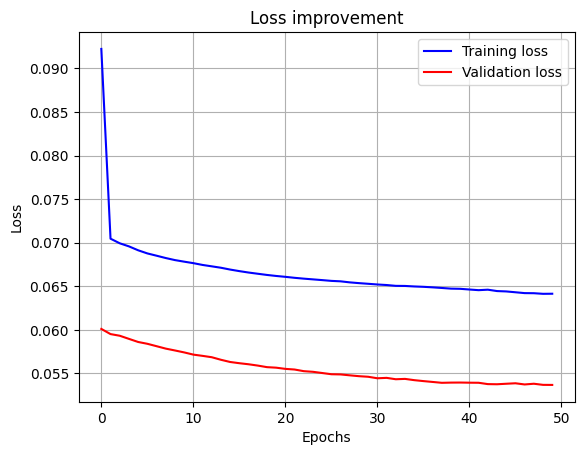

In [8]:
plt.figure()
plt.plot(history.history["loss"], "b", label="Training loss")
plt.plot(history.history["val_loss"], "r", label="Validation loss")
plt.grid()
plt.title("Loss improvement")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
y_pred = model.predict(x_val, verbose=0)
y_pred_inv = (y_pred * DFstd[0] + DFmean[0]).ravel() #inverse scaling
y_val_inv = y_val * DFstd[0] + DFmean[0]

rmse = np.sqrt(np.mean(np.square(y_val_inv - y_pred_inv)))
range = np.max(y_val_inv) - np.min(y_val_inv)
print("RMSE: {:.3f}\nRMSE/data range: {:.3%}".format(rmse, rmse / range))

RMSE: 0.274
RMSE/data range: 3.636%


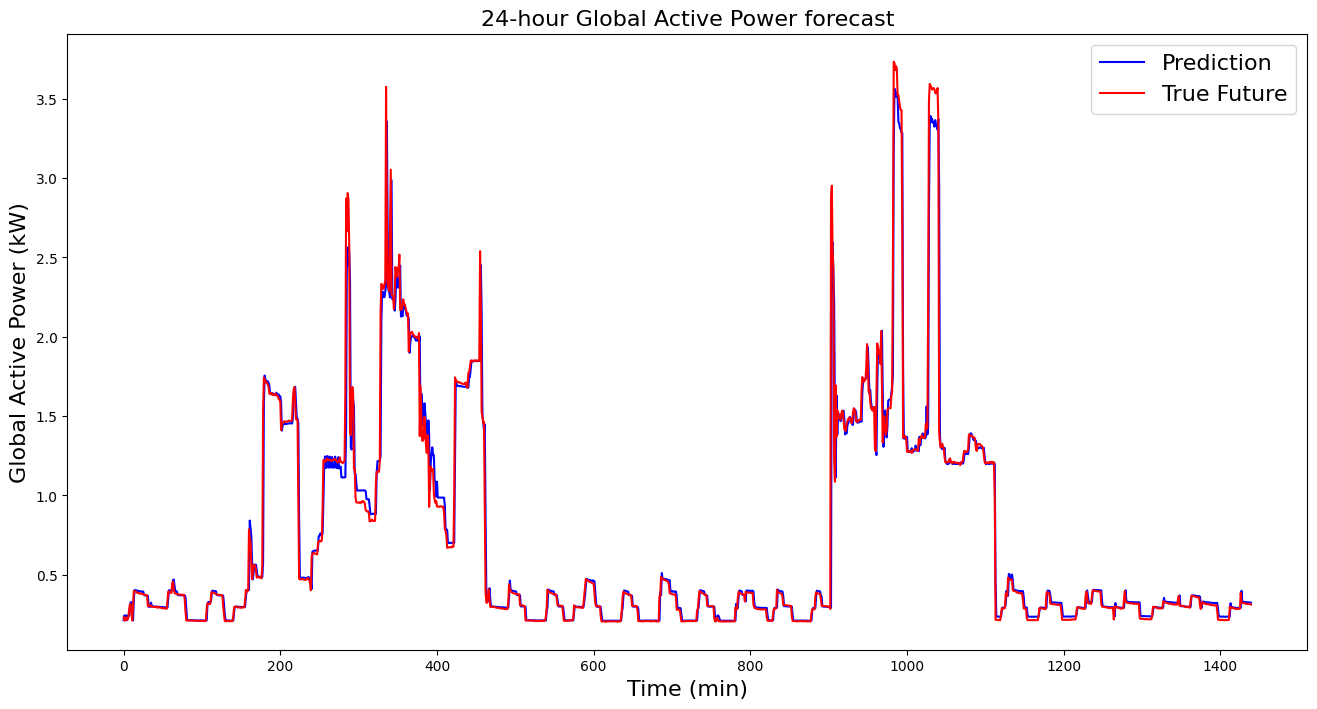

In [10]:
day = 24 * 60
plt.figure(figsize = (16, 8))
plt.plot(y_pred_inv[:day], "b", label="Prediction")
plt.plot(y_val_inv[:day], "r", label="True Future")
plt.title("24-hour Global Active Power forecast", fontsize=16)
plt.xlabel("Time (min)", fontsize=16)
plt.ylabel("Global Active Power (kW)", fontsize=16)
plt.legend(fontsize=16)
plt.show()